**Część 1 - przetwarzanie i czyszczenie danych**



1.  Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at

2.   Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at

3. Pobierz wszystkie linki do tweetów i przekaż je do listy.

4. Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)

5. Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).

6. Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_sm

In [1]:
import pandas as pd
import numpy as np
import spacy

In [2]:
MAIN_DF = pd.read_csv("/content/drive/MyDrive/Programowanie/Kopia warszawa - warszawa.csv")

In [3]:
df = MAIN_DF.copy()

In [4]:
# Część 1 zadanie 1

df["created_at"] = [elem.replace("Mon", "Poniedziałek") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Tue", "Wtorek") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Wed", "Środa") for elem in df["created_at"]]

df["created_at"] = [elem.replace("Thu", "Czwartek") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Fri", "Piątek") for elem in df["created_at"]]

df["created_at"] = [elem.replace("Sat", "Sobota") for elem in df["created_at"]]
df["created_at"] = [elem.replace("Sun", "Niedziela") for elem in df["created_at"]]

In [5]:
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Piątek Jun 04 15:00:49 +0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,Sun May 24 20:01:26 +0000 2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False
1,NaN,Piątek Jun 04 15:34:48 +0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,Sat Feb 23 20:23:00 +0000 2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False
2,NaN,Piątek Jun 04 15:00:23 +0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,Wed Nov 18 17:55:16 +0000 2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False
3,NaN,Piątek Jun 04 14:39:29 +0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,Sat Jul 27 13:22:01 +0000 2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False
4,NaN,Piątek Jun 04 15:28:16 +0000 2021,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,Tue Sep 22 18:04:31 +0000 2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,Wtorek Jun 01 02:04:38 +0000 2021,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,Sun Jul 05 08:04:13 +0000 2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False
5381,NaN,Wtorek Jun 01 02:35:04 +0000 2021,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,Sun Jul 12 07:08:16 +0000 2020,1282210056327528448,False,Prawa strona. Motto to BÓG HONOR OJCZYZNA WALC...,118480,2754,2940,7,NaN,Marek Kopacz#AndrzejDuda2020. #PolskiLad🇵🇱🇵🇱👊,MarekKopacz10,134918,NaN,NaN,False
5382,NaN,Wtorek Jun 01 02:56:11 +0000 2021,NaN,NaN,NaN,0,1399560380473647105,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitte

In [6]:
# Część 1 zadanie 2

df["user_created_at"] = [elem.replace("Jan", "01") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Feb", "02") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Mar", "03") for elem in df["user_created_at"]]

df["user_created_at"] = [elem.replace("Apr", "04") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("May", "05") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Jun", "06") for elem in df["user_created_at"]]

df["user_created_at"] = [elem.replace("Jul", "07") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Aug", "08") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Sep", "09") for elem in df["user_created_at"]]

df["user_created_at"] = [elem.replace("Oct", "10") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Nov", "11") for elem in df["user_created_at"]]
df["user_created_at"] = [elem.replace("Dec", "12") for elem in df["user_created_at"]]

In [7]:
df.head(10)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Piątek Jun 04 15:00:49 +0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,Sun 05 24 20:01:26 +0000 2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False
1,NaN,Piątek Jun 04 15:34:48 +0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,Sat 02 23 20:23:00 +0000 2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False
2,NaN,Piątek Jun 04 15:00:23 +0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,Wed 11 18 17:55:16 +0000 2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False
3,NaN,Piątek Jun 04 14:39:29 +0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,Sat 07 27 13:22:01 +0000 2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False
4,NaN,Piątek Jun 04 15:28:16 +0000 2021,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,Tue 09 22 18:04:31 +0000 2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False
5,NaN,Piątek Jun 04 15:08:32 +0000 2021,NaN,NaN,NaN,0,1400831842668982286,NaN,NaN,NaN,pl,NaN,NaN,NaN,48,1.400791e+18,MichalSzczerba,"<a href=""http://twitter.com/download/android"" ...",Warszawa 4 czerwca. Z liderką demokratycznej B...,https://twitter.com/Hillview56/status/14008318...,Sat 05 10 08:13:57 +0000 2014,2538640486,False,Guitars/Corfu/Historian/Psychology/Martial Art...,44102,165,679,0,"The Hague, Holland.",Hillview🇮🇩🇳🇱Holland❤🤍💙StandWithBelarus 🤍❤🤍,Hillview56,23357,NaN,NaN,False
6,NaN,Piątek Jun 04 14:49:36 +0000 2021,NaN,https://twitter.com/dionizje/status/1400827080...,NaN,0,1400827080925929474,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","warszawa, 4.06.21. https://t.co/LXMQE8Wcw1",https://twitter.com/dionizje/status/1400827080...,Mon 07 14 12:59:51 +0000 2014,2710407405,False,take a glass of wine and come with me to the t...,10259,681,312,8,Polska,𝔰𝔷𝔞𝔱𝔞𝔫🌸✨,dionizje,34267,NaN,https://curiouscat.qa/dionizje,False
7,NaN,Piątek Jun 04 15:19:37 +0000 2021,NaN,NaN,http://m.in https://wydarzenia.interia.pl/pols...,1,1400834632153718786,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",W uroczystości wzięła udział https://t.co/V8xU...,https://twitter.com/Int_Wydarzenia/status/1400...,Tue 0

In [8]:
# Część 1 zadanie 3

tweet_urls = df["tweet_url"].tolist()

In [9]:
tweet_urls

['https://twitter.com/d3bil0x/status/1400829903591854083',
 'https://twitter.com/ftg_soccer/status/1400838456276918278',
 'https://twitter.com/marek14618246/status/1400829794598666245',
 'https://twitter.com/Krystyn01906241/status/1400824535499280386',
 'https://twitter.com/mirek65038903/status/1400836809525968896',
 'https://twitter.com/Hillview56/status/1400831842668982286',
 'https://twitter.com/dionizje/status/1400827080925929474',
 'https://twitter.com/Int_Wydarzenia/status/1400834632153718786',
 'https://twitter.com/GreatGreyTryjan/status/1400833111592669190',
 'https://twitter.com/piekoshevski/status/1400828064096002049',
 'https://twitter.com/Izabela12671885/status/1400824661852704770',
 'https://twitter.com/Kamilek01/status/1400824729221611520',
 'https://twitter.com/Lukasz_Malin/status/1400835145930788865',
 'https://twitter.com/emajoteweska/status/1400834250618900483',
 'https://twitter.com/tvnwarszawa/status/1400830326939729924',
 'https://twitter.com/TheGoons13/status/1400

In [10]:
# Część 1 zadanie 4

tweet_links = df["urls"].tolist()

In [11]:
tweet_links

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'http://m.in https://wydarzenia.interia.pl/polska/news-warszawa-odslonieto-pomnik-solidarnosci-swietlana-cichanousk,nId,5276601',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://tvn24.pl/tvnwarszawa/najnowsze/warszawa-park-im-edwarda-rydza-smiglego-zabytkiem-5112668',
 nan,
 nan,
 'https://ipn.gov.pl/pl/aktualnosci/40962,Promocja-albumu-General-Jozef-Haller-18731960-Warszawa-22-lipca-2017.html https://twitter.com/WBH_2016/status/1400679959170109444',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://www.youtube.com/watch?v=7USScPgPUsg',
 nan,
 nan,
 'https://youtu.be/tQN_hYg1h_U',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27160758,krzyk-i-odsloniete-dekolty-kobiet-w-centrum-warszawy-dla-bialorusi.html#a=338&c=143',
 nan,
 'https://twitter.com/_Go_A_/status/1400820609639145473',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27157444,warszawskie-puby-przygotowuja-sie-na-euro-2020-na-przeszkodzie.html',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

In [12]:
# Removing nan values from list

tweet_links = [str(x) for x in tweet_links]
tweet_links_urls = [x for x in tweet_links if x != 'nan']

In [13]:
tweet_links_urls

['http://m.in https://wydarzenia.interia.pl/polska/news-warszawa-odslonieto-pomnik-solidarnosci-swietlana-cichanousk,nId,5276601',
 'https://tvn24.pl/tvnwarszawa/najnowsze/warszawa-park-im-edwarda-rydza-smiglego-zabytkiem-5112668',
 'https://ipn.gov.pl/pl/aktualnosci/40962,Promocja-albumu-General-Jozef-Haller-18731960-Warszawa-22-lipca-2017.html https://twitter.com/WBH_2016/status/1400679959170109444',
 'https://www.youtube.com/watch?v=7USScPgPUsg',
 'https://youtu.be/tQN_hYg1h_U',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27160758,krzyk-i-odsloniete-dekolty-kobiet-w-centrum-warszawy-dla-bialorusi.html#a=338&c=143',
 'https://twitter.com/_Go_A_/status/1400820609639145473',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27157444,warszawskie-puby-przygotowuja-sie-na-euro-2020-na-przeszkodzie.html',
 'https://radiowarszawa.com.pl/tragiczny-wypadek-pod-warszawa-przyczyna-byl-los/',
 'https://www.instagram.com/p/CPtB6E1Nujl/?utm_medium=twitter',
 'https://tvn24.pl/tvnwarszawa/okolice

In [14]:
# Część 1 zadanie 5

media_links = df["media"].tolist()

In [15]:
media_links

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/dionizje/status/1400827080925929474/photo/1',
 nan,
 nan,
 'https://twitter.com/piekoshevski/status/1400828064096002049/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/Tomasz_Walczak/status/1400838699928129536/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/AutoMapa/status/1400830216289857539/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/warszawabot/status/1400824738914709504/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/Kw_PSP_Wwa/status/1400838850763710466/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/sqesh2/status/1400834361898029064/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/Butkievic/status/1400834654077284361/photo/1',
 nan,
 nan,
 nan,
 nan,
 nan,
 'https://twitter.com/

In [16]:
media_links = [str(x) for x in media_links]
media_links_urls = [x for x in media_links if x != 'nan']

In [17]:
media_links_urls

['https://twitter.com/dionizje/status/1400827080925929474/photo/1',
 'https://twitter.com/piekoshevski/status/1400828064096002049/photo/1',
 'https://twitter.com/Tomasz_Walczak/status/1400838699928129536/photo/1',
 'https://twitter.com/AutoMapa/status/1400830216289857539/photo/1',
 'https://twitter.com/warszawabot/status/1400824738914709504/photo/1',
 'https://twitter.com/Kw_PSP_Wwa/status/1400838850763710466/photo/1',
 'https://twitter.com/sqesh2/status/1400834361898029064/photo/1',
 'https://twitter.com/Butkievic/status/1400834654077284361/photo/1',
 'https://twitter.com/themback/status/1400831534135906305/photo/1',
 'https://twitter.com/MichalSzczerba/status/1400509272979615746/photo/1',
 'https://twitter.com/WarszawskiBlog/status/1400820103709696014/photo/1',
 'https://twitter.com/AutoMapa/status/1400815115423961100/photo/1',
 'https://twitter.com/michalwm89/status/1400715748998275072/photo/1',
 'https://twitter.com/warszawa/status/1400814602053578758/photo/1',
 'https://twitter.co

In [18]:
# Część 1 zadanie 6

nlp = spacy.load("pl_core_news_sm")

In [19]:
from spacy.lang.pl.stop_words import STOP_WORDS as pl_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

stop = list(pl_stop) + list(en_stop)

In [20]:
df["text_without_stopwords"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [21]:
df["text_without_stopwords"]

0       💬@AKowalinski prezes RN Warszawa: Profanacje a...
1       GOAL! Ursus Warszawa Poland 3. Liga Ursus Wars...
2       Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...
3       @trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...
4       @GrzegorzKwartni @Jola79113776 @trzaskowski_ @...
                              ...                        
5380    Wyobraziłam sobie, wyglądała Warszawa, PiS rzą...
5381    Rada Warszawy podjęła uchwałę krajobrazową dot...
5382    Rada Warszawy podjęła uchwałę krajobrazową dot...
5383    Zbliża 81 rocznica I Transportu KL Auschwitz 1...
5384                                @_warszawa Skajak amo
Name: text_without_stopwords, Length: 5385, dtype: object

In [22]:
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
0,NaN,Piątek Jun 04 15:00:49 +0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,Sun 05 24 20:01:26 +0000 2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,💬@AKowalinski prezes RN Warszawa: Profanacje a...
1,NaN,Piątek Jun 04 15:34:48 +0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,Sat 02 23 20:23:00 +0000 2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,GOAL! Ursus Warszawa Poland 3. Liga Ursus Wars...
2,NaN,Piątek Jun 04 15:00:23 +0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,Wed 11 18 17:55:16 +0000 2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...
3,NaN,Piątek Jun 04 14:39:29 +0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,Sat 07 27 13:22:01 +0000 2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...
4,NaN,Piątek Jun 04 15:28:16 +0000 2021,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,Tue 09 22 18:04:31 +0000 2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,Wtorek Jun 01 02:04:38 +0000 2021,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,Sun 07 05 08:04:13 +0000 2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False,"Wyobraziłam sobie, wyglądała Warszawa, PiS rzą..."
5381,NaN,Wtorek Jun 01 02:35:04 +0000 2021,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,Sun 07 12 07:08:16 +0000 2020,1282210056327528448,False,Prawa strona. Motto to BÓG HONOR OJCZYZNA WALC...,118480,2754,2940,7,NaN,Marek Kopacz

**Część 2 - eksploracyjna analiza danych**

1. Wypisz top5 tweetów z największa liczbą polubień.

2. Wypisz top5 tweetów z największa liczbą retweetów.

3. Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).

4. Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).

5. Wyświetl tweety użytkownika. który ma najwięcej followersów.

6. Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)

7. Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu


In [23]:
# Część 2 zadanie 1

top = df["favorite_count"]
max_value = top.max()

max_value

1427

In [24]:
df.nlargest(5, "favorite_count")

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
493,NaN,Piątek Jun 04 09:50:39 +0000 2021,NaN,https://twitter.com/trzaskowski_/status/140075...,NaN,1427,1400751844415225857,NaN,NaN,NaN,pl,NaN,False,NaN,152,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Dziś z prezydent-elekt @Tsihanouskaya mówiliśm...,https://twitter.com/trzaskowski_/status/140075...,Thu 09 08 13:48:38 +0000 2011,370112160,False,Prezydent Warszawy,482,588021,653,627,Warszawa,Rafał Trzaskowski,trzaskowski_,9010,NaN,NaN,True,Dziś prezydent-elekt @Tsihanouskaya mówiliśmy ...
1168,NaN,Czwartek Jun 03 17:46:45 +0000 2021,StandWithBelarus,https://twitter.com/MichalSzczerba/status/1400...,NaN,762,1400509272979615746,NaN,NaN,NaN,pl,"Warsaw, Poland",False,NaN,98,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Warszawa czeka na @Tsihanouskaya. #StandWithBe...,https://twitter.com/MichalSzczerba/status/1400...,Tue 07 21 21:00:37 +0000 2009,58919878,False,Warszawiak. Poseł na Sejm. Wiceprzewodniczący ...,123451,109122,4262,269,Warszawa,Michał Szczerba,MichalSzczerba,23196,NaN,https://www.facebook.com/posel.szczerba/,False,Warszawa czeka @Tsihanouskaya. #StandWithBelar...
5029,NaN,Wtorek Jun 01 08:15:35 +0000 2021,NaN,NaN,"https://warszawa.wyborcza.pl/warszawa/7,54420,...",637,1399640757523386368,NaN,NaN,NaN,pl,NaN,False,NaN,87,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Jasio, który nie panuje nad swoją jadaczką, zn...",https://twitter.com/KapenGenezyp/status/139964...,Sun 06 11 10:48:28 +0000 2017,873854439538511872,False,"Obywatel, banuję chamstwo, trolli i boty powie...",271762,22192,9233,54,NaN,Genezyp Kapen,KapenGenezyp,162325,NaN,NaN,False,"Jasio, panuje swoją jadaczką, przegrał proces...."
3881,NaN,Wtorek Jun 01 21:25:43 +0000 2021,NaN,NaN,https://twitter.com/DoRzeczy_pl/status/1399786...,624,1399839600168902657,NaN,NaN,NaN,pl,NaN,False,1.399787e+18,182,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Czyli prezydenci opozycji: \n👉Poznań -cieszy s...,https://twitter.com/PatrykJaki/status/13998396...,Sun 01 03 21:23:38 +0000 2010,101576198,False,"dr nauk o bezpieczeństwie, wykładowca akademic...",20316,267333,962,337,"Warszawa - Opole, Polska",Patryk Jaki - MEP,PatrykJaki,7261,NaN,https://www.facebook.com/PatrykJaki/,True,Czyli prezydenci opozycji: 👉Poznań -cieszy okr...
3351,NaN,Środa Jun 02 08:23:19 +0000 2021,NaN,https://twitter.com/trzaskowski_/status/140000...,NaN,569,1400005093156691970,NaN,NaN,NaN,pl,NaN,False,NaN,55,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Pierwszy z 21 nowych pociągów @SKM_Warszawa ju...,https://twitter.com/trzaskowski_/status/140000...,Thu 09 08 13:48:38 +0000 2011,370112160,False,Prezydent Warszawy,482,588021,653,627,Warszawa,Rafał Trzaskowski,trzaskowski_,9010,NaN,NaN,True,Pierwszy 21 nowych pociągów @SKM_Warszawa doce...


In [25]:
# Część 2 zadanie 2

df.nlargest(5, "retweet_count")

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
4635,NaN,Wtorek Jun 01 12:35:42 +0000 2021,NaN,NaN,NaN,0,1399706219066052613,NaN,NaN,NaN,pl,NaN,NaN,NaN,1753,1.382435e+18,dreadreznor,"<a href=""http://twitter.com/download/android"" ...","HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...",https://twitter.com/rayofwangxian/status/13997...,Fri 12 27 17:22:00 +0000 2019,1210611632608546819,False,22 • she/her • nsfw • profile pic from @ANGERY...,64682,84,545,2,NaN,blue,rayofwangxian,23213,NaN,NaN,False,"HALO WARSZAWA chętnie rozjaśnię, ufarbuję, zet..."
1222,NaN,Czwartek Jun 03 15:03:44 +0000 2021,Warszawa,NaN,NaN,0,1400468246902550530,NaN,NaN,NaN,pl,NaN,NaN,NaN,909,1.394730e+18,dziadkowiebiz,"<a href=""http://twitter.com/download/android"" ...",UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,https://twitter.com/pshemyslav1984/status/1400...,Thu 02 06 18:44:25 +0000 2014,2328621843,False,"Fan, fanatyk? Legia ! Śmietnik prywatny! Odczu...",5180,178,890,0,Warszawa,Przemek Edwinowicz,pshemyslav1984,5637,NaN,NaN,False,UWAGA #Warszawa Śniadeckich 12/16 Pani Danuta ...
4123,NaN,Wtorek Jun 01 19:11:21 +0000 2021,Warszawa,NaN,NaN,0,1399805787036434437,NaN,NaN,NaN,pl,NaN,NaN,NaN,909,1.394730e+18,dziadkowiebiz,"<a href=""http://twitter.com/download/android"" ...",UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,https://twitter.com/hjigvs/status/139980578703...,Fri 04 29 13:51:21 +0000 2016,726046215666814976,False,NaN,19574,624,746,7,Hell,...,hjigvs,23031,NaN,NaN,False,UWAGA #Warszawa Śniadeckich 12/16 Pani Danuta ...
5017,NaN,Wtorek Jun 01 08:21:32 +0000 2021,Warszawa,NaN,NaN,0,1399642253853925383,NaN,NaN,NaN,pl,NaN,NaN,NaN,909,1.394730e+18,dziadkowiebiz,"<a href=""https://mobile.twitter.com"" rel=""nofo...",UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,https://twitter.com/MarekPrus6/status/13996422...,Wed 05 13 17:26:44 +0000 2020,1260622450540371968,False,"Film, literatura, prawo, sport ( czynnie, nie ...",25884,1985,1994,0,NaN,Marek Prus,MarekPrus6,8495,NaN,NaN,False,UWAGA #Warszawa Śniadeckich 12/16 Pani Danuta ...
5095,NaN,Wtorek Jun 01 07:43:05 +0000 2021,Warszawa,NaN,NaN,0,1399632579532361728,NaN,NaN,NaN,pl,NaN,NaN,NaN,909,1.394730e+18,dziadkowiebiz,"<a href=""http://twitter.com/download/android"" ...",UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,https://twitter.com/Frosty_127/status/13996325...,Sat 08 25 18:32:58 +0000 2018,1033421996686761985,False,I love you Sunshine 💜💜💜💜💜💜💜\nshe/her|intp| bts...,69952,273,301,19,somewhere far away,Noona 🐋🌈🏳️‍🌈,Frosty_127,30032,NaN,NaN,False,UWAGA #Warszawa Śniadeckich 12/16 Pani Danuta ...


In [26]:
# Część 2 zadanie 3

df.loc[df["possibly_sensitive"] == False]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
6,NaN,Piątek Jun 04 14:49:36 +0000 2021,NaN,https://twitter.com/dionizje/status/1400827080...,NaN,0,1400827080925929474,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","warszawa, 4.06.21. https://t.co/LXMQE8Wcw1",https://twitter.com/dionizje/status/1400827080...,Mon 07 14 12:59:51 +0000 2014,2710407405,False,take a glass of wine and come with me to the t...,10259,681,312,8,Polska,𝔰𝔷𝔞𝔱𝔞𝔫🌸✨,dionizje,34267,NaN,https://curiouscat.qa/dionizje,False,"warszawa, 4.06.21. https://t.co/LXMQE8Wcw1"
7,NaN,Piątek Jun 04 15:19:37 +0000 2021,NaN,NaN,http://m.in https://wydarzenia.interia.pl/pols...,1,1400834632153718786,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",W uroczystości wzięła udział https://t.co/V8xU...,https://twitter.com/Int_Wydarzenia/status/1400...,Tue 05 12 11:37:57 +0000 2009,39480709,False,Najnowsze i najważniejsze wiadomości ze świata...,413,38993,360,251,"Kraków, Poland",Interia,Int_Wydarzenia,104597,NaN,http://wydarzenia.interia.pl,False,W uroczystości wzięła udział https://t.co/V8xU...
9,NaN,Piątek Jun 04 14:53:31 +0000 2021,NaN,https://twitter.com/piekoshevski/status/140082...,NaN,23,1400828064096002049,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",To właśnie w tym miejscu przedwojenna Warszawa...,https://twitter.com/piekoshevski/status/140082...,Tue 07 09 21:15:28 +0000 2013,1581474709,False,"Lubię gdy budynki są piękne, a gospodarka cent...",70891,1821,892,11,"Warszawa, Polska",Jakub Sanitarny Segregator 💉,piekoshevski,18103,NaN,NaN,False,To miejscu przedwojenna Warszawa styka powojen...
14,NaN,Piątek Jun 04 15:02:30 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,5,1400830326939729924,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",Park został otwarty dla mieszkańców w 1955 rok...,https://twitter.com/tvnwarszawa/status/1400830...,Tue 05 12 19:02:00 +0000 2009,39568364,False,Najszybsze informacje i zawsze aktualny serwis...,10,313988,20,411,Warszawa,TVN Warszawa,tvnwarszawa,76920,NaN,http://www.tvnwarszawa.pl,True,Park otwarty mieszkańców 1955 roku. https://t....
16,NaN,Piątek Jun 04 15:35:47 +0000 2021,NaN,https://twitter.com/Tomasz_Walczak/status/1400...,NaN,4,1400838699928129536,galopujacymajor,NaN,86394645,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@galopujacymajor sobie gdzieś tam libkuje poza...,https://twitter.com/Tomasz_Walczak/status/1400...,Tue 02 11 21:14:29 +0000 2014,2339158777,False,Dziennikarz działu Opinie Super Expressu. Mówi...,18408,4808,1572,40,NaN,Tomasz Walczak,Tomasz_Walczak,26691,NaN,NaN,False,"@galopujacymajor libkuje Warszawą, siedząc dom..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,NaN,Wtorek Jun 01 04:23:56 +0000 2021,NaN,NaN,https://twitter.com/LukaszKohut/status/1399474...,0,1399582463572258828,NaN,NaN,NaN,pl,NaN,False,1.399475e+18,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",Dla tego debil Warszawa to zawsze Warschau htt...,https://twitter.com/Jacenty51437933/status/139...,Sat 05 01 20:15:27 +0000 2021,1388587814296621059,False,Nie znoszę klamstwa,19047,1252,2802,3,"Dolnośląskie, Polska",Jacenty,Jacenty51437933,7697,NaN,NaN,False,Dla debil Warszawa Warschau https://t.co/RvrNk...
5354,NaN,Wtorek Jun 01 03:48:11 +0000 2021,kos

In [27]:
# Część 2 zadanie 4

import regex as re

In [28]:
# df["user_created_at"] = df["user_created_at"].astype(str)
# poźniej zmieniam typ danych w kolumnie a w tej linijce operuję na 
# str więc w razie czego umieściłam u góry kod do ponownej zmiany w str
# żeby nie musieć resetować całego datasetu 

df["user_created_at"] = df["user_created_at"].str.extract(r'(\d{4}$)')

# stworzony w regex101 regex wydzielający rok z daty
# można by się pokusić o zastosowanie bardziej zaawansowanego regexu,
# który wydzieli nam jeszcze miesiąc utworzenia i dopiero potem oceni 
# jakie konto jest "najmłodsze", jednak zasada pozostaje ta sama

In [29]:
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
0,NaN,Piątek Jun 04 15:00:49 +0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,💬@AKowalinski prezes RN Warszawa: Profanacje a...
1,NaN,Piątek Jun 04 15:34:48 +0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,GOAL! Ursus Warszawa Poland 3. Liga Ursus Wars...
2,NaN,Piątek Jun 04 15:00:23 +0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...
3,NaN,Piątek Jun 04 14:39:29 +0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...
4,NaN,Piątek Jun 04 15:28:16 +0000 2021,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,Wtorek Jun 01 02:04:38 +0000 2021,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False,"Wyobraziłam sobie, wyglądała Warszawa, PiS rzą..."
5381,NaN,Wtorek Jun 01 02:35:04 +0000 2021,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,2020,1282210056327528448,False,Prawa strona. Motto to BÓG HONOR OJCZYZNA WALC...,118480,2754,2940,7,NaN,Marek Kopacz#AndrzejDuda2020. #PolskiLad🇵🇱🇵🇱👊,MarekKopacz10,134918,NaN,NaN,False,Rada Warszawy podjęła uchwałę krajobrazową dot...
5382,NaN,Wtorek Jun 01 02:56:11 +0000 2021,NaN,NaN,NaN,0

In [30]:
df["user_created_at"] = df["user_created_at"].astype(int) 

In [31]:
df.nsmallest(2, "user_created_at")

# najmniejsza wartość(rok) i wydzielony cały rekor (tweet)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
3967,NaN,Wtorek Jun 01 20:23:26 +0000 2021,NaN,NaN,NaN,0,1399823926520393729,NaN,NaN,NaN,pl,NaN,NaN,NaN,24,1.399692e+18,Policja_KSP,"<a href=""http://twitter.com/download/android"" ...",Policjanci z wydziału do walki z przestępczośc...,https://twitter.com/hex24/status/1399823926520...,2006,23293,False,"""Prawda nie sprawia tyle dobrego, ile złego sp...",103951,714,1656,3,Polska,Hex 🇵🇱 #PolskiŁad #MuremZaPolskimMundurem,hex24,66518,NaN,NaN,False,Policjanci wydziału walki przestępczością prze...
1186,NaN,Czwartek Jun 03 18:08:18 +0000 2021,NaN,NaN,NaN,1,1400514697485488133,warszawa,1.400513e+18,199290168,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@warszawa @WTP_Warszawa @ZDM_Warszawa O i może...,https://twitter.com/siwa/status/14005146974854...,2007,5750372,False,"Jestem ubogą staruszką zbierającą chrust, labo...",3424,468,469,0,"Warszawa, Żoliborz",Anna‑Maria Siwińska 🏴‍☠️,siwa,9763,NaN,http://siwinska.net,False,@warszawa @WTP_Warszawa @ZDM_Warszawa O autobu...


In [32]:
# Część 2 zadanie 5

df.nlargest(1, "user_followers_count")

# określenie, które konto ma najwięcej followerów

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
1620,NaN,Czwartek Jun 03 11:01:43 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/praga-polnoc/wars...,0,1400407341875466242,NaN,NaN,NaN,pl,NaN,False,NaN,5,1.400402e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...","""Jego spokój pozytywnie udziela się pozostałym...",https://twitter.com/tvn24/status/1400407341875...,2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True,"""Jego spokój pozytywnie udziela pozostałym żyr..."


In [33]:
df.loc[df["user_id"] == "14493047"]

# odfiltrowanie tweetów po id konta, które uzyskaliśmy powyżej

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
1620,NaN,Czwartek Jun 03 11:01:43 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/praga-polnoc/wars...,0,1400407341875466242,NaN,NaN,NaN,pl,NaN,False,NaN,5,1.400402e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...","""Jego spokój pozytywnie udziela się pozostałym...",https://twitter.com/tvn24/status/1400407341875...,2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True,"""Jego spokój pozytywnie udziela pozostałym żyr..."
1871,NaN,Czwartek Jun 03 07:34:35 +0000 2021,NaN,NaN,NaN,0,1400355214381752329,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400355e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...","Zarząd Transportu Miejskiego zapowiada, że czę...",https://twitter.com/tvn24/status/1400355214381...,2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True,"Zarząd Transportu Miejskiego zapowiada, część ..."
2817,NaN,Środa Jun 02 14:35:15 +0000 2021,NaN,NaN,NaN,0,1400098691860606976,NaN,NaN,NaN,pl,NaN,NaN,NaN,3,1.400097e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...","""Tylko w ostatnich czterech dniach zaszczepili...",https://twitter.com/tvn24/status/1400098691860...,2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True,"""Tylko ostatnich czterech dniach zaszczepiliśm..."
2856,NaN,Środa Jun 02 15:00:28 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,0,1400105038236860421,NaN,NaN,NaN,pl,NaN,False,NaN,5,1.400104e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...",W środę po południu w okolicach mostu Świętokr...,https://twitter.com/tvn24/status/1400105038236...,2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True,W środę południu okolicach mostu Świętokrzyski...
4293,NaN,Wtorek Jun 01 17:00:13 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/wola/warszawa-pow...,0,1399772787363958784,NaN,NaN,NaN,pl,NaN,False,NaN,2,1.399761e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...",Sprawcy szuka policja.\n\nhttps://t.co/J5YwjOPMTy,https://twitter.com/tvn24/status/1399772787363...,2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True,Sprawcy szuka policja. https://t.co/J5YwjOPMTy
4995,NaN,Wtorek Jun 01 09:19:08 +0000 2021,NaN,NaN,NaN,0,1399656749586604036,NaN,NaN,NaN,pl,NaN,NaN,NaN,6,1.399656e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...",Aktywista miejski Jan Śpiewak przegrał proces ...,https://twitter.com/tvn24/status/1399656749586...,2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True,Aktywista miejski Jan Śpiewak przegrał proces ...
5187,NaN,Wtorek Jun 01 07:02:05 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,0,1399622262232391681,NaN,NaN,NaN,pl,NaN,False,NaN,2,1.399620e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...",W poniedziałek późnym wieczorem na Mokotowie z...,https://twitter.com/tvn24/status/1399622262232...,2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True,W poniedziałek późnym wieczorem Mokotowie

In [34]:
# Część 2 zadanie 6

df.loc[df["user_verified"] == True]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
14,NaN,Piątek Jun 04 15:02:30 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,5,1400830326939729924,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",Park został otwarty dla mieszkańców w 1955 rok...,https://twitter.com/tvnwarszawa/status/1400830...,2009,39568364,False,Najszybsze informacje i zawsze aktualny serwis...,10,313988,20,411,Warszawa,TVN Warszawa,tvnwarszawa,76920,NaN,http://www.tvnwarszawa.pl,True,Park otwarty mieszkańców 1955 roku. https://t....
32,NaN,Piątek Jun 04 15:45:39 +0000 2021,NaN,NaN,"https://warszawa.wyborcza.pl/warszawa/7,54420,...",0,1400841186005356546,NaN,NaN,NaN,pl,NaN,False,NaN,1,1.400841e+18,GazetaStoleczna,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://t.co/3TSBVAk63h\nPuby i restauracje ju...,https://twitter.com/gazeta_wyborcza/status/140...,2009,19179390,False,Oficjalne konto Gazety Wyborczej,14839,818237,586,1532,Warszawa + 32 miasta,Gazeta Wyborcza.pl,gazeta_wyborcza,224266,NaN,https://bit.ly/2GLXBlN,True,https://t.co/3TSBVAk63h Puby restauracje przyg...
48,NaN,Piątek Jun 04 15:44:32 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/okolice/warszawa-...,5,1400840904403996672,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",Uroczystości odbyły się w 29. rocznicę upadku ...,https://twitter.com/tvnwarszawa/status/1400840...,2009,39568364,False,Najszybsze informacje i zawsze aktualny serwis...,10,313988,20,411,Warszawa,TVN Warszawa,tvnwarszawa,76920,NaN,http://www.tvnwarszawa.pl,True,Uroczystości odbyły 29. rocznicę upadku rządu....
129,NaN,Piątek Jun 04 13:45:25 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,5,1400810928766136323,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",Kolejnym etapem produkcji będzie wyposażenie w...,https://twitter.com/tvnwarszawa/status/1400810...,2009,39568364,False,Najszybsze informacje i zawsze aktualny serwis...,10,313988,20,411,Warszawa,TVN Warszawa,tvnwarszawa,76920,NaN,http://www.tvnwarszawa.pl,True,Kolejnym etapem produkcji wyposażenie wnętrza ...
147,NaN,Piątek Jun 04 14:09:33 +0000 2021,4czerwca,https://twitter.com/trzaskowski_/status/140081...,NaN,521,1400817002290323464,NaN,NaN,NaN,pl,NaN,False,NaN,67,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","#4czerwca, w rocznicę pierwszych częściowo wol...",https://twitter.com/trzaskowski_/status/140081...,2011,370112160,False,Prezydent Warszawy,482,588021,653,627,Warszawa,Rafał Trzaskowski,trzaskowski_,9010,NaN,NaN,True,"#4czerwca, rocznicę pierwszych częściowo wolny..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,NaN,Wtorek Jun 01 06:54:16 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,8,1399620293774225411,NaN,NaN,NaN,pl,NaN,False,NaN,2,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",W poniedziałek późnym wieczorem na Mokotowie z...,https://twitter.com/tvnwarszawa/status/1399620...,2009,39568364,False,Najszybsze informacje i zawsze aktualny serwis...,10,313988,20,411,Warszawa,TVN Warszawa,tvnwarszawa,76920,NaN,http://www.tvnwarszawa.pl,True,W poniedziałek późnym wieczorem Mokotowie post...
5286,NaN,Wtorek Jun 01 05:03:08 +0000 2021,WspieramyRodziny DzieńDziecka,https://twitter.com/j_wisniewska/status/139959...,http://m.in,54,1399592325324619780,NaN,NaN,NaN,pl,NaN,False,NaN,5,NaN

In [35]:
# Część 2 zadanie 7

df["created_at"] = df["created_at"].str.extract(r'([A-Z, Ś]+[a-z, ą ]{4,8})')

In [36]:
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
0,NaN,Piątek,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,💬@AKowalinski prezes RN Warszawa: Profanacje a...
1,NaN,Piątek,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,GOAL! Ursus Warszawa Poland 3. Liga Ursus Wars...
2,NaN,Piątek,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...
3,NaN,Piątek,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...
4,NaN,Piątek,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,Wtorek,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False,"Wyobraziłam sobie, wyglądała Warszawa, PiS rzą..."
5381,NaN,Wtorek,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,2020,1282210056327528448,False,Prawa strona. Motto to BÓG HONOR OJCZYZNA WALC...,118480,2754,2940,7,NaN,Marek Kopacz#AndrzejDuda2020. #PolskiLad🇵🇱🇵🇱👊,MarekKopacz10,134918,NaN,NaN,False,Rada Warszawy podjęła uchwałę krajobrazową dot...
5382,NaN,Wtorek,NaN,NaN,NaN,0,1399560380473647105,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/Dosia1960/sta

In [37]:
top = df["created_at"]
max_value = top.max()

max_value

'Środa '

In [38]:
df["created_at"].value_counts()

Środa        1756
Wtorek       1577
Czwartek     1261
Piątek        791
Name: created_at, dtype: int64

**Część 3 - przetwarzanie języka naturalnego**

Pracując na kolumnie text:

1. Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons

2. Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places

3. Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

4. Stwórz model, który rozpozna hashtagi w treści tweeta. Następnie przekaż je do kolumny o nazwie hashtags

In [39]:
# Część 3 zadanie 1 (persName)

doc = [nlp(x) for x in df["text"]]

pers_lista = []

for tw in doc:
  pers = ""

  for keyword in tw.ents:

    if keyword.label_ == "persName":
      pers = pers + keyword.text + ", "

  pers_lista.append(pers)

df["persons"] = pers_lista

In [40]:
# Część 3 zadanie 2 (placeName)

doc = [nlp(x) for x in df["text"]]

place_lista = []

for tw in doc:
  place = ""

  for keyword in tw.ents:

    if keyword.label_ == "placeName":
      place = place + keyword.text + ", "

  place_lista.append(place)

df["places"] = place_lista

In [41]:
# Część 3 zadanie 3 (orgName)

doc = [nlp(x) for x in df["text"]]

org_lista = []

for tw in doc:
  org = ""

  for keyword in tw.ents:

    if keyword.label_ == "orgName":
      org = org + keyword.text + ", "

  org_lista.append(org)

df["organization"] = org_lista

In [42]:
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,places,organization
0,NaN,Piątek,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,💬@AKowalinski prezes RN Warszawa: Profanacje a...,,"Kowaliński,","RN Warszawa,"
1,NaN,Piątek,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,GOAL! Ursus Warszawa Poland 3. Liga Ursus Wars...,"Huragan Morąg\nGOAL, Finland,","Poland,","Ursus Warszawa, Ursus Warszawa,"
2,NaN,Piątek,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,"Jarosława Kaczyńskiego, Mateusza Morawieckiego,","Polska, Warszawa, Powązki,","Krematorium im.,"
3,NaN,Piątek,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,,"Warszawy,",
4,NaN,Piątek,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,Wtorek,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False,"Wyobraziłam sobie, wyglądała Warszawa, PiS rzą...",,"Warszawa,","PiS,"
5381,NaN,Wtorek,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,2020,1282210056327528448,False,Prawa strona. Motto to BÓG HONOR OJCZYZNA WALC...,118480,2754,2940,7,NaN,Marek Kopacz#AndrzejDuda2020. #PolskiLad🇵🇱🇵🇱👊,MarekKopacz10,134918,NaN,NaN,False,Rada Warszawy 

In [43]:
# Część 3 zadanie 4

df.head(16)
# sprawdzam jak wygląda kolumna z hashtagami, które z rekordów posiadają 
# hashtagi niezidentyfikowane przez kolumną hashtags

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,places,organization
0,NaN,Piątek,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,💬@AKowalinski prezes RN Warszawa: Profanacje a...,,"Kowaliński,","RN Warszawa,"
1,NaN,Piątek,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,GOAL! Ursus Warszawa Poland 3. Liga Ursus Wars...,"Huragan Morąg\nGOAL, Finland,","Poland,","Ursus Warszawa, Ursus Warszawa,"
2,NaN,Piątek,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,"Jarosława Kaczyńskiego, Mateusza Morawieckiego,","Polska, Warszawa, Powązki,","Krematorium im.,"
3,NaN,Piątek,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,,"Warszawy,",
4,NaN,Piątek,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,,,
5,NaN,Piątek,NaN,NaN,NaN,0,1400831842668982286,NaN,NaN,NaN,pl,NaN,NaN,NaN,48,1.400791e+18,MichalSzczerba,"<a href=""http://twitter.com/download/android"" ...",Warszawa 4 czerwca. Z liderką demokratycznej B...,https://twitter.com/Hillview56/status/14008318...,2014,2538640486,False,Guitars/Corfu/Historian/Psychology/Martial Art...,44102,165,679,0,"The Hague, Holland.",Hillview🇮🇩🇳🇱Holland❤🤍💙StandWithBelarus 🤍❤🤍,Hillview56,23357,NaN,NaN,False,Warszawa 4 czerwca. Z liderką demokratycznej B...,,"Warszawa, Białorusi, Białorusi,",
6,NaN,Piątek,NaN,https://twitter.com/dionizje/status/1400827080...,NaN,0,1400827080925929474,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","warszawa, 4.06.21. https://t.co/LXMQE8Wcw1",https://twitter.com/dionizje/status/1400827080...,2014,2710407405,False,take a glass of wine and come with me to the t...,10259,681,312,8,Polska,𝔰𝔷𝔞𝔱𝔞𝔫🌸✨,dionizje,34267,NaN,https://curiouscat.qa/dionizje,False,"warszawa, 4.06.21. https://t.co/LXMQE8Wcw1",,"warszawa,",
7,NaN,Piątek,NaN

In [44]:
df.text.str.findall(r"#+[a-zA-Z,Ą,ą,Ć,ć,Ę,ę,Ł,ł,Ń,ń,Ó,ó,Ś,ś,Ź,ź,Ż,ż0-9(_)]{1,}")

0       [#StudioRN, #Kowaliński, #Konfederacja]
1                                            []
2                                            []
3                                            []
4                                            []
                         ...                   
5380                                         []
5381              [#AbsurdyWarszawy, #Warszawa]
5382              [#AbsurdyWarszawy, #Warszawa]
5383                                         []
5384                                         []
Name: text, Length: 5385, dtype: object

In [45]:
List_of_hashtags = df.text.str.findall(r"#+[a-zA-Z,Ą,ą,Ć,ć,Ę,ę,Ł,ł,Ń,ń,Ó,ó,Ś,ś,Ź,ź,Ż,ż0-9(_)]{1,}")

In [46]:
df["hashtags"] = List_of_hashtags

In [47]:
df.head(16)
# sprawdzam czy pojawiły się wcześniej niezidentyfikowane hashtagi

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,places,organization
0,NaN,Piątek,"[#StudioRN, #Kowaliński, #Konfederacja]",NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,💬@AKowalinski prezes RN Warszawa: Profanacje a...,,"Kowaliński,","RN Warszawa,"
1,NaN,Piątek,[],NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,GOAL! Ursus Warszawa Poland 3. Liga Ursus Wars...,"Huragan Morąg\nGOAL, Finland,","Poland,","Ursus Warszawa, Ursus Warszawa,"
2,NaN,Piątek,[],NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,"Jarosława Kaczyńskiego, Mateusza Morawieckiego,","Polska, Warszawa, Powązki,","Krematorium im.,"
3,NaN,Piątek,[],NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,,"Warszawy,",
4,NaN,Piątek,[],NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,,,
5,NaN,Piątek,"[#WolnaBiałoruś, #ŚwiętoWolności]",NaN,NaN,0,1400831842668982286,NaN,NaN,NaN,pl,NaN,NaN,NaN,48,1.400791e+18,MichalSzczerba,"<a href=""http://twitter.com/download/android"" ...",Warszawa 4 czerwca. Z liderką demokratycznej B...,https://twitter.com/Hillview56/status/14008318...,2014,2538640486,False,Guitars/Corfu/Historian/Psychology/Martial Art...,44102,165,679,0,"The Hague, Holland.",Hillview🇮🇩🇳🇱Holland❤🤍💙StandWithBelarus 🤍❤🤍,Hillview56,23357,NaN,NaN,False,Warszawa 4 czerwca. Z liderką demokratycznej B...,,"Warszawa, Białorusi, Białorusi,",
6,NaN,Piątek,[],https://twitter.com/dionizje/status/1400827080...,NaN,0,1400827080925929474,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","warszawa, 4.06.21. https://t.co/LXMQE8Wcw1",https://twitter.com/dionizje/status/1400827080...,2014,2710407405,False,take a glass of wine and come with me to the t...,10259,681,312,8,Polska,𝔰𝔷𝔞𝔱𝔞𝔫🌸✨,dionizje,34267,NaN,https://curiouscat.qa/dionizje,False,"warszawa, 4.06.21. https://t.co/LXMQE8

**Część 4 - rozwiązywanie problemów/umiejętność interpretowania dokumentacji**


1. Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia

In [48]:
# Część 4 zadanie 1

import matplotlib as mpl
import matplotlib.pyplot as plt

In [49]:
df["created_at"].value_counts()

Środa        1756
Wtorek       1577
Czwartek     1261
Piątek        791
Name: created_at, dtype: int64

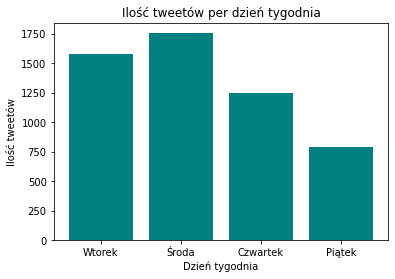

In [50]:
dane = {"Wtorek":1577, "Środa":1756, "Czwartek":1251, "Piątek":791}

courses = list(dane.keys())
values = list(dane.values())
  
fig = plt.figure(figsize = (6, 4))

plt.bar(courses, values, color ="teal", width = 0.8)
 
plt.xlabel("Dzień tygodnia")
plt.ylabel("Ilość tweetów")
plt.title("Ilość tweetów per dzień tygodnia")

plt.show()